In [1]:
import pandas as pd
import yfinance as yahoo

In [2]:
# Download Data of your instruments
stocks = ['IUSG', 'VLUE', 'IEV', 'EUDG', 'DEM', 'PICB', 'BNDX', 'IHY', 'CEMB',
          'SHY', 'PFE', 'MSFT', 'AMD', 'MCD', 'AAPL', 'AMZN', 'JPM', 'BA', 'KO']


data = yahoo.download(stocks, period="5y")['Adj Close']

data = data.fillna(method='ffill')

[*********************100%***********************]  19 of 19 completed


In [3]:
# Calculate the returns of instruments, statistics & correlation
returns = (data - data.shift(1))/ data.shift(1)# get the returns for every serie

statistics = returns.describe().T

statistics['mad'] = returns.mad()

statistics['skew'] = returns.skew()

statistics['kurtosis'] = returns.kurtosis()

statistics = statistics.T

correlation = returns.corr() # correlation

sigma = covariance = returns.cov() # covariance

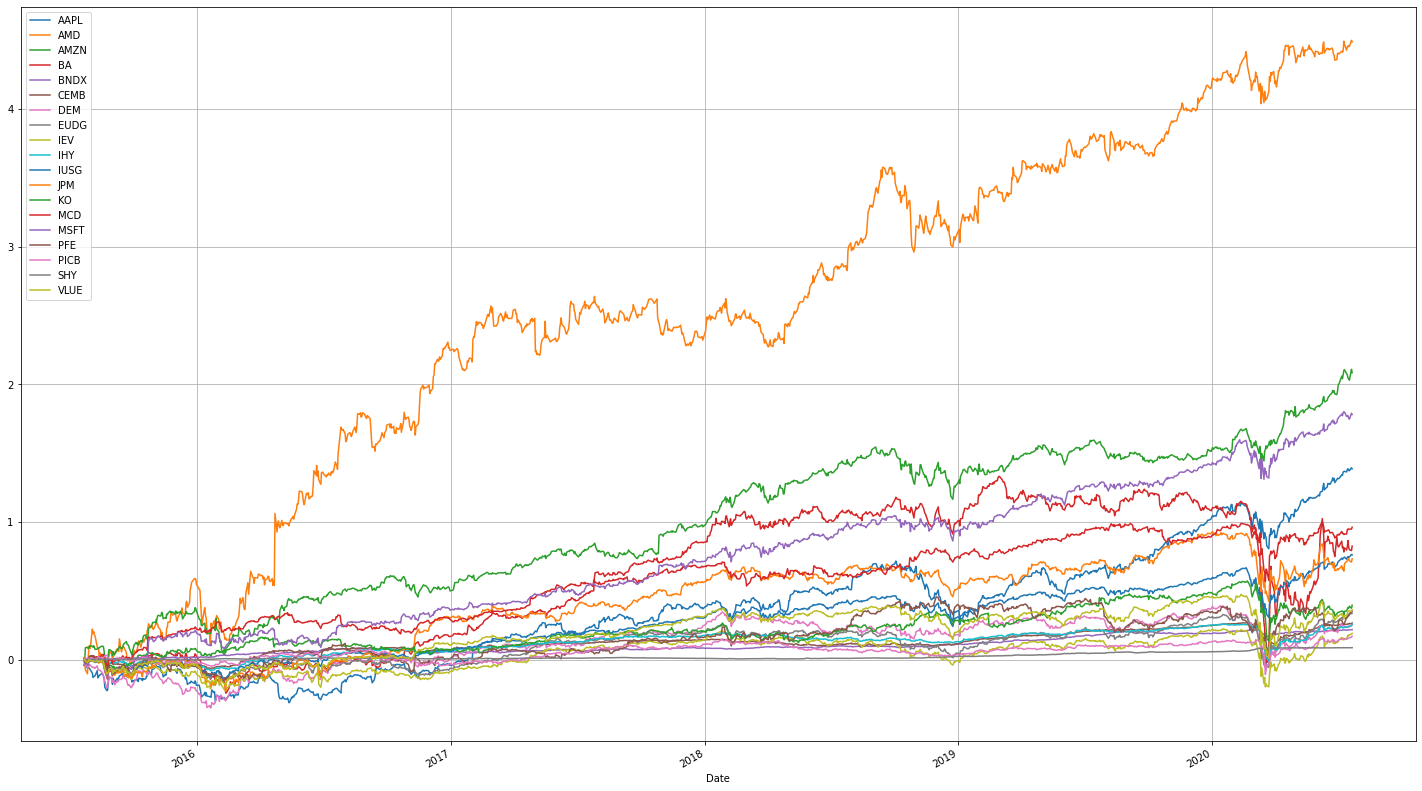

In [4]:
# Plot the returns of the instruments
ret = returns.cumsum().plot(figsize=(25,15))
ret.grid()

In [5]:
#Show Statistics of the instruments
statistics.T

,count,mean,std,min,25%,50%,75%,max,mad,skew,kurtosis
AAPL,1259.0,0.001101,0.018245,-0.128647,-0.006014,0.000897,0.009549,0.119808,0.012140,-0.171351,7.561559
AMD,1259.0,0.003566,0.041203,-0.242291,-0.016807,0.001899,0.022017,0.522901,0.027643,1.691600,22.269201
AMZN,1259.0,0.001656,0.019125,-0.079221,-0.006592,0.001534,0.010573,0.132164,0.012913,0.391690,5.451263
BA,1259.0,0.000655,0.027508,-0.238484,-0.008652,0.001072,0.010508,0.243186,0.015397,0.197063,22.329532
BNDX,1259.0,0.000173,0.001995,-0.022933,-0.000738,0.000184,0.001268,0.008660,0.001346,-2.631902,29.161663
CEMB,1259.0,0.000211,0.004779,-0.057130,-0.001474,0.000381,0.002146,0.034953,0.002815,-2.069671,31.610034
DEM,1259.0,0.000200,0.013763,-0.117630,-0.006364,0.001045,0.007347,0.075427,0.009476,-1.200016,10.834067
EUDG,1259.0,0.000267,0.011857,-0.112859,-0.004553,0.000585,0.006134,0.085014,0.007526,-1.475971,18.481465
IEV,1259.0,0.000151,0.012542,-0.113471,-0.004516,0.000507,0.005857,0.089404,0.007797,-1.845716,20.815794
IHY,1259.0,0.000204,0.004961,-0.053327,-0.001708,0.000388,0.002454,0.038590,0.003009,-1.231767,23.021284


In [6]:
# Show Correlations
correlation

,AAPL,AMD,AMZN,BA,BNDX,CEMB,DEM,EUDG,IEV,IHY,IUSG,JPM,KO,MCD,MSFT,PFE,PICB,SHY,VLUE
AAPL,1.000000,0.382852,0.564046,0.454689,0.010473,0.246139,0.606732,0.613068,0.615654,0.303089,0.792164,0.551040,0.426449,0.462696,0.716424,0.440035,0.066980,-0.281215,0.699276
AMD,0.382852,1.000000,0.352616,0.249181,0.013938,0.184989,0.368018,0.361739,0.369351,0.157352,0.455695,0.296576,0.232025,0.235715,0.363124,0.251223,0.065903,-0.178090,0.416848
AMZN,0.564046,0.352616,1.000000,0.290148,0.003719,0.151122,0.482655,0.461395,0.456847,0.180092,0.659072,0.352509,0.265274,0.311376,0.670289,0.344294,0.019542,-0.210451,0.484571
BA,0.454689,0.249181,0.290148,1.000000,0.120914,0.394834,0.568137,0.608259,0.646442,0.474104,0.626548,0.619158,0.494491,0.494558,0.462319,0.364229,0.250427,-0.189556,0.679408
BNDX,0.010473,0.013938,0.003719,0.120914,1.000000,0.276452,0.084587,0.104251,0.065923,0.161391,0.056456,-0.068598,0.160501,0.138996,0.058217,0.010795,0.377032,0.408442,0.005035
CEMB,0.246139,0.184989,0.151122,0.394834,0.276452,1.000000,0.443822,0.396814,0.421678,0.537568,0.353015,0.317198,0.322551,0.337425,0.262631,0.193730,0.379566,0.031515,0.372465
DEM,0.606732,0.368018,0.482655,0.568137,0.084587,0.443822,1.000000,0.788174,0.843734,0.541893,0.771648,0.665582,0.514195,0.513130,0.656825,0.452077,0.278919,-0.239388,0.779456
EUDG,0.613068,0.361739,0.461395,0.608259,0.104251,0.396814,0.788174,1.000000,0.940817,0.570181,0.810009,0.682745,0.583413,0.589597,0.671219,0.503611,0.347370,-0.240473,0.801728
IEV,0.615654,0.369351,0.456847,0.646442,0.065923,0.421678,0.843734,0.940817,1.000000,0.616089,0.830464,0.757653,0.600534,0.592459,0.677035,0.515816,0.355510,-0.280678,0.856143
IHY,0.303089,0.157352,0.180092,0.474104,0.161391,0.537568,0.541893,0.570181,0.616089,1.000000,0.443449,0.425815,0.436061,0.386968,0.298582,0.256555,0.549000,-0.073295,0.495384


In [7]:
# Show Covariance
covariance

,AAPL,AMD,AMZN,BA,BNDX,CEMB,DEM,EUDG,IEV,IHY,IUSG,JPM,KO,MCD,MSFT,PFE,PICB,SHY,VLUE
AAPL,3.328711e-04,0.000288,1.968177e-04,0.000228,3.812119e-07,2.145993e-05,0.000152,0.000133,0.000141,2.743576e-05,0.000179,0.000189,0.000096,0.000125,0.000228,1.116514e-04,7.796101e-06,-3.446959e-06,1.744463e-04
AMD,2.878032e-04,0.001698,2.778695e-04,0.000282,1.145692e-06,3.642369e-05,0.000209,0.000177,0.000191,3.216687e-05,0.000232,0.000230,0.000117,0.000143,0.000261,1.439546e-04,1.732313e-05,-4.929771e-06,2.348438e-04
AMZN,1.968177e-04,0.000278,3.657832e-04,0.000153,1.419095e-07,1.381176e-05,0.000127,0.000105,0.000110,1.708894e-05,0.000156,0.000127,0.000062,0.000088,0.000223,9.157588e-05,2.384384e-06,-2.704108e-06,1.267196e-04
BA,2.281973e-04,0.000282,1.526472e-04,0.000757,6.635589e-06,5.190186e-05,0.000215,0.000198,0.000223,6.470531e-05,0.000213,0.000320,0.000167,0.000201,0.000221,1.393386e-04,4.394748e-05,-3.503119e-06,2.555424e-04
BNDX,3.812119e-07,0.000001,1.419095e-07,0.000007,3.980085e-06,2.635576e-06,0.000002,0.000002,0.000002,1.597472e-06,0.000001,-0.000003,0.000004,0.000004,0.000002,2.995097e-07,4.798656e-06,5.474402e-07,1.373420e-07
CEMB,2.145993e-05,0.000036,1.381176e-05,0.000052,2.635576e-06,2.283602e-05,0.000029,0.000022,0.000025,1.274536e-05,0.000021,0.000028,0.000019,0.000024,0.000022,1.287501e-05,1.157158e-05,1.011773e-07,2.433722e-05
DEM,1.523485e-04,0.000209,1.270433e-04,0.000215,2.322492e-06,2.918919e-05,0.000189,0.000129,0.000146,3.700198e-05,0.000131,0.000172,0.000087,0.000104,0.000157,8.652764e-05,2.448934e-05,-2.213433e-06,1.466795e-04
EUDG,1.326243e-04,0.000177,1.046311e-04,0.000198,2.466054e-06,2.248399e-05,0.000129,0.000141,0.000140,3.354264e-05,0.000119,0.000152,0.000085,0.000103,0.000139,8.304455e-05,2.627631e-05,-1.915590e-06,1.299804e-04
IEV,1.408740e-04,0.000191,1.095819e-04,0.000223,1.649442e-06,2.527242e-05,0.000146,0.000140,0.000157,3.833605e-05,0.000129,0.000178,0.000093,0.000110,0.000148,8.996836e-05,2.844482e-05,-2.364961e-06,1.468172e-04
IHY,2.743576e-05,0.000032,1.708894e-05,0.000065,1.597472e-06,1.274536e-05,0.000037,0.000034,0.000038,2.461595e-05,0.000027,0.000040,0.000027,0.000028,0.000026,1.770225e-05,1.737705e-05,-2.443097e-07,3.360663e-05


In [9]:
# Calculate the deltas of the instruments as the weights assigned multiplied by their correlations (elasticity)
instruments = pd.DataFrame(index= data.columns)
instruments['weigths'] = 1/len(instruments.index) #secure allocation is equal 1
instruments['deltas'] = (instruments.weigths * correlation).sum()
instruments.deltas 

AAPL    0.456347
AMD     0.293634
AMZN    0.359953
BA      0.453068
BNDX    0.157291
CEMB    0.348606
DEM     0.532642
EUDG    0.557575
IEV     0.572709
IHY     0.408436
IUSG    0.582429
JPM     0.478175
KO      0.439027
MCD     0.441637
MSFT    0.492775
PFE     0.383432
PICB    0.252239
SHY    -0.097236
VLUE    0.563587
Name: deltas, dtype: float64

In [11]:
# Request the standard deviation of the instruments
instruments['Stdev'] = returns.std()
instruments.Stdev

AAPL    0.018245
AMD     0.041203
AMZN    0.019125
BA      0.027508
BNDX    0.001995
CEMB    0.004779
DEM     0.013763
EUDG    0.011857
IEV     0.012542
IHY     0.004961
IUSG    0.012377
JPM     0.018784
KO      0.012284
MCD     0.014753
MSFT    0.017417
PFE     0.013907
PICB    0.006380
SHY     0.000672
VLUE    0.013673
Name: Stdev, dtype: float64

In [12]:
# Calculate the strees of delta i X standard deviation i, apply 3 deviations to have a metric of measure
instruments['stress'] = (instruments.deltas * instruments.Stdev)
portfolio_stress = instruments.stress.sum()
portfolio_stress

0.11616648397173487

In [14]:
# If all the worst events happen at once, must detect the worst deviation of the instruments and apply it simultaneously
poe = (returns / returns.std()).min()
fullstress = sum(instruments.stress.multiply(poe))
fullstress

-0.9489037397710599

In [15]:
# Equally weigthed portfolio assumed to do the test unbiased
portfolio = ((data.IUSG * 0.0526) + (data.VLUE * 0.0526) + (data.IEV * 0.0526) + (data.EUDG * 0.0526) + (data.DEM * 0.0526) +
             (data.PICB	* 0.0526) + (data.BNDX * 0.0526) + (data.IHY * 0.0526) + (data.CEMB * 0.0526) + (data.SHY * 0.0526)
             + (data.PFE * 0.0526) + (data.MSFT * 0.0526) + (data.AMD * 0.0526) + (data.MCD * 0.0526) +(data.AAPL * 0.0526)
             + (data.AMZN * 0.0526) + (data.JPM * 0.0526) + (data.BA * 0.0526) + (data.KO * 0.0526))

In [16]:
# Calculate metrics of returns and statistics
portfolio_returns = (portfolio - portfolio.shift(1))/ portfolio.shift(1)

portfolio_stats = portfolio_returns.describe(percentiles=[.01,.05,.10]).T

portfolio_stats['var'] = portfolio_returns.var()

portfolio_stats['skew'] = portfolio_returns.skew()

portfolio_stats['Kurtosis'] = portfolio_returns.kurtosis()

In [17]:
portfolio_stats

count       1259.000000
mean           0.001082
std            0.013466
min           -0.086447
1%            -0.039235
5%            -0.022366
10%           -0.012102
50%            0.001374
max            0.072698
var            0.000181
skew          -0.332597
Kurtosis       6.542882
dtype: float64

In [18]:
#Check calculation stdev = sqrt(var)
import numpy as np
np.sqrt(portfolio_returns.var())

0.013466323827294947

In [19]:
# VaR at 1% inverse cummulative dist. (-2.32635)
VaR = -2.32635 *  0.013364
VaR

-0.0310893414

In [25]:
#Calculate Gradients of VaR, as (deltas X covariance) divided by (Portfolio Std X 1% Inverse Cummulative dist.) 
CVaR = pd.DataFrame(index=data.columns)
CVaR['numerator'] = (instruments.deltas.multiply(covariance)).sum()
CVaR['denominator'] = portfolio_returns.std() * (-2.32635)
CVaR['GradVaR'] = -CVaR.numerator / CVaR.denominator
CVaR.GradVaR

AAPL    0.038264
AMD     0.042799
AMZN    0.025732
BA      0.054054
BNDX    0.000189
CEMB    0.004469
DEM     0.036434
EUDG    0.034084
IEV     0.038258
IHY     0.006588
IUSG    0.041119
JPM     0.042595
KO      0.021396
MCD     0.026415
MSFT    0.041732
PFE     0.019719
PICB    0.002448
SHY     0.000118
VLUE    0.042487
Name: GradVaR, dtype: float64

In [26]:
# Calculate Component VaR of the Risk Factors j
CVaR['CVaRj'] = CVaR.GradVaR * instruments.deltas
CVaR.CVaRj

AAPL    0.017462
AMD     0.012567
AMZN    0.009262
BA      0.024490
BNDX    0.000030
CEMB    0.001558
DEM     0.019406
EUDG    0.019004
IEV     0.021911
IHY     0.002691
IUSG    0.023949
JPM     0.020368
KO      0.009394
MCD     0.011666
MSFT    0.020565
PFE     0.007561
PICB    0.000617
SHY    -0.000011
VLUE    0.023945
Name: CVaRj, dtype: float64

In [30]:
# Calculate the Theta i of the instruments
CVaR['thetai'] = (CVaR.CVaRj * correlation).sum()
CVaR.thetai

AAPL    0.151403
AMD     0.070114
AMZN    0.063346
BA      0.210817
BNDX    0.000089
CEMB    0.010318
DEM     0.196397
EUDG    0.201332
IEV     0.238421
IHY     0.020881
IUSG    0.265024
JPM     0.185050
KO      0.078357
MCD     0.097890
MSFT    0.192541
PFE     0.055084
PICB    0.002959
SHY     0.000021
VLUE    0.256409
Name: thetai, dtype: float64

In [33]:
# Calculate the Componente VaR of the Instruments i
CVaR['CVaRi'] = CVaR.thetai * (1/19)
CVaR.CVaRi

AAPL    0.007969
AMD     0.003690
AMZN    0.003334
BA      0.011096
BNDX    0.000005
CEMB    0.000543
DEM     0.010337
EUDG    0.010596
IEV     0.012548
IHY     0.001099
IUSG    0.013949
JPM     0.009739
KO      0.004124
MCD     0.005152
MSFT    0.010134
PFE     0.002899
PICB    0.000156
SHY     0.000001
VLUE    0.013495
Name: CVaRi, dtype: float64

In [34]:
CVaR.CVaRi.sum()

0.12086589530516545

In [36]:
# Calculate the percentage of the Components of VaR instruments as a whole
CVaR.CVaRi / CVaR.CVaRi.sum()

AAPL    0.065929
AMD     0.030532
AMZN    0.027584
BA      0.091801
BNDX    0.000039
CEMB    0.004493
DEM     0.085522
EUDG    0.087671
IEV     0.103821
IHY     0.009093
IUSG    0.115406
JPM     0.080581
KO      0.034121
MCD     0.042626
MSFT    0.083843
PFE     0.023986
PICB    0.001289
SHY     0.000009
VLUE    0.111654
Name: CVaRi, dtype: float64

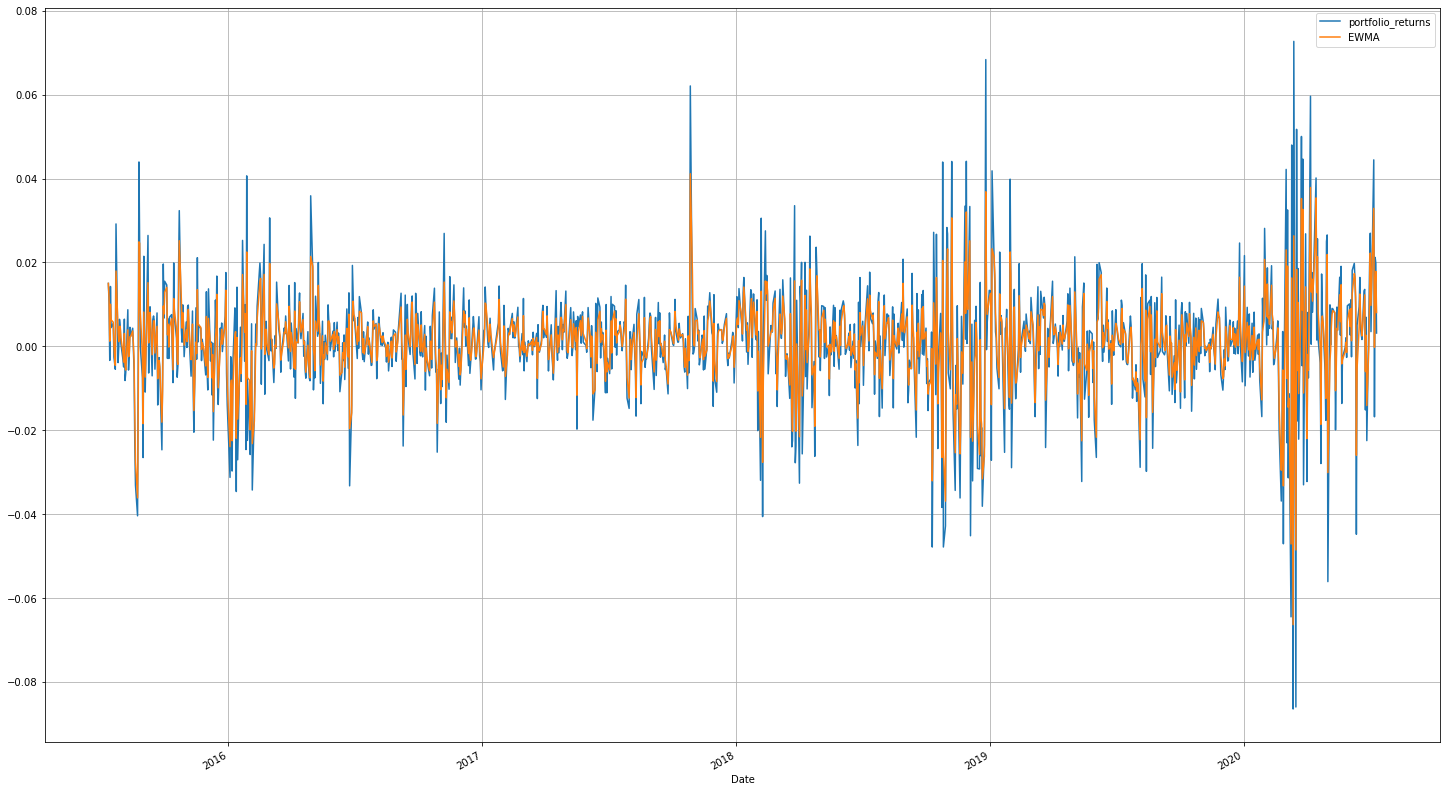

In [95]:
# EWMA Calculation
ewma = pd.DataFrame()

ewma['portfolio_returns'] = portfolio_returns

ewma['EWMA'] = ewma.portfolio_returns.ewm(com=0.5).mean()

ew = ewma.plot(figsize=(25,15))
ew.grid()